/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


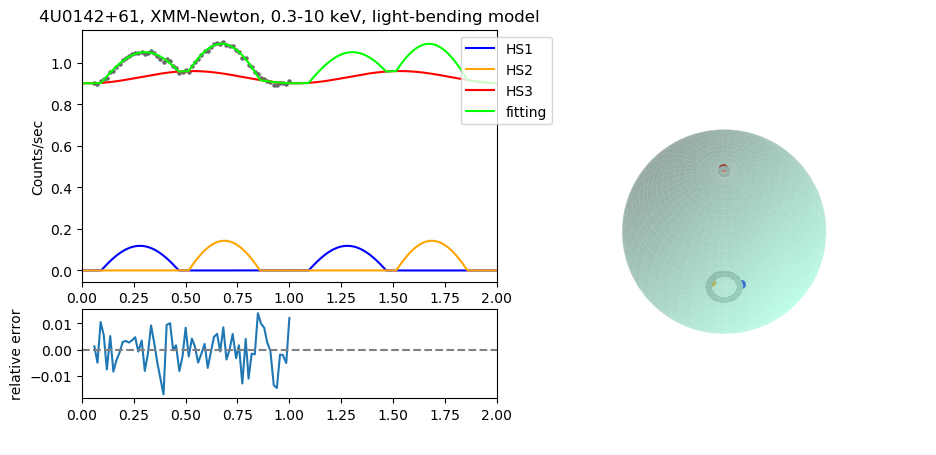

inclination angle: 55.773553703623406
Hot_spot_1: 170.22902109484895 100.74286444505498 2.068487933578467
Hot_spot_2: 171.67416797391613 247.18249898082505 3.394748757189678
Hot_spot_3: 2.3376986609969714 191.23131031300326 1.3142074634967071


In [1]:
# 4U 0142+61 fitting

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D


# load data
# magnetar 4U 0142+61 from paper:
df = pd.read_csv('4U0142+61_0.3-10keV.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]




# geometric figure
# Create a new figure
fig = plt.figure(figsize = (12.0, 6.0), dpi = 100)
ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan = 18, colspan = 5, projection = "3d")
ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan = 11, colspan = 5)
ax3 = plt.subplot2grid((20, 11), (14, 0), rowspan = 4, colspan = 5)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)

# pulse profile
# theta = pi / 5
# i = pi / 3
# a = theta, b = i, c = phi, d = normalization

b_ini = np.radians(45)
# HS1
a_1_ini = np.radians(148)
c_1_ini = np.radians(130)
d_1_ini = 2.4
# HS2
a_2_ini = np.radians(160)
c_2_ini = np.radians(250)
d_2_ini = 10
# HS3 140 single
a_3_ini = np.radians(32)
c_3_ini = np.radians(140)
d_3_ini = 1.05
# # HS4
# a_4 = np.radians(30)
# c_4 = np.radians(200)
# d_4 = 0



# light-bending factor
f_lb = 1. / 3.

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2
# def func_2(x, a_1, a_2, b, c_1, c_2, d_1, d_2):
#     return (mu(x, a_1, b, c_1, d_1) + abs(mu(x, a_1, b, c_1, d_1))) / 2 + (mu(x, a_2, b, c_2, d_2) + abs(mu(x, a_2, b, c_2, d_2))) / 2
def func_3(x, a_1, a_2, a_3, b, c_1, c_2, c_3, d_1, d_2, d_3):
    return (mu(x, a_1, b, c_1, d_1) + abs(mu(x, a_1, b, c_1, d_1))) / 2 + (mu(x, a_2, b, c_2, d_2) + abs(mu(x, a_2, b, c_2, d_2))) / 2 + (mu(x, a_3, b, c_3, d_3) + abs(mu(x, a_3, b, c_3, d_3))) / 2
# def func_4(x, a_1, a_2, a_3, a_4, b, c_1, c_2, c_3, c_4, d_1, d_2, d_3, d_4):
#     return (mu(x, a_1, b, c_1, d_1) + abs(mu(x, a_1, b, c_1, d_1))) / 2 + (mu(x, a_2, b, c_2, d_2) + abs(mu(x, a_2, b, c_2, d_2))) / 2 + (mu(x, a_3, b, c_3, d_3) + abs(mu(x, a_3, b, c_3, d_3))) / 2 + (mu(x, a_4, b, c_4, d_4) + abs(mu(x, a_4, b, c_4, d_4))) / 2

x = np.linspace(-0.5, 2.5, 10000)





# fitting
# parameter_initial = np.array([-1.5, 1, 0.2, 4000])
# parameter_initial_2 = np.array([-1.5, 1, 0.2, 4000])
parameter_initial_3 = np.array([a_1_ini, a_2_ini, a_3_ini, b_ini, c_1_ini, c_2_ini, c_3_ini, d_1_ini, d_2_ini, d_3_ini])
# parameter_initial_4 = np.array([-1.5, 1, 0.2, 4000])

parameter_optimal, covariance = scipy.optimize.curve_fit(func_3, x_data, y_data, p0 = parameter_initial_3)

y_fitting = func_3(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3], parameter_optimal[4], parameter_optimal[5], parameter_optimal[6], parameter_optimal[7], parameter_optimal[8], parameter_optimal[9])
y_fitting_same_size_as_y_data = func_3(x_data, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3], parameter_optimal[4], parameter_optimal[5], parameter_optimal[6], parameter_optimal[7], parameter_optimal[8], parameter_optimal[9])






r = 1.01 * r

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(parameter_optimal[0])
x_track_hs_2 = scale * r * np.sin(parameter_optimal[1]) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(parameter_optimal[1]) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(parameter_optimal[1])
x_track_hs_3 = scale * r * np.sin(parameter_optimal[2]) * np.cos(theta_sphere)
y_track_hs_3 = scale * r * np.sin(parameter_optimal[2]) * np.sin(theta_sphere)
z_track_hs_3 = scale * r * np.cos(parameter_optimal[2])
# x_track_hs_4 = scale * r * np.sin(a_4) * np.cos(theta_sphere)
# y_track_hs_4 = scale * r * np.sin(a_4) * np.sin(theta_sphere)
# z_track_hs_4 = scale * r * np.cos(a_4)
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 1, color = "silver")
ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 1, color = "silver")
ax2.scatter(x_track_hs_3, y_track_hs_3, z_track_hs_3, s = 1, color = "silver")
# ax2.scatter(x_track_hs_4, y_track_hs_4, z_track_hs_4, s = 3, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.cos(parameter_optimal[4])
x_hs_2 = scale * r * np.sin(parameter_optimal[1]) * np.cos(parameter_optimal[5])
x_hs_3 = scale * r * np.sin(parameter_optimal[2]) * np.cos(parameter_optimal[6])
# x_hs_4 = scale * r * np.sin(a_4) * np.cos(c_4)
y_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.sin(parameter_optimal[4])
y_hs_2 = scale * r * np.sin(parameter_optimal[1]) * np.sin(parameter_optimal[5])
y_hs_3 = scale * r * np.sin(parameter_optimal[2]) * np.sin(parameter_optimal[6])
# y_hs_4 = scale * r * np.sin(a_4) * np.sin(c_4)
z_hs_1 = scale * r * np.cos(parameter_optimal[0])
z_hs_2 = scale * r * np.cos(parameter_optimal[1])
z_hs_3 = scale * r * np.cos(parameter_optimal[2])
# z_hs_4 = scale * r * np.cos(a_4)

# x_hs = [x_hs_1, x_hs_2, x_hs_3, x_hs_4]
# y_hs = [y_hs_1, y_hs_2, y_hs_3, y_hs_4]
# z_hs = [z_hs_1, z_hs_2, z_hs_3, z_hs_4]
x_hs = [x_hs_1, x_hs_2, x_hs_3]
y_hs = [y_hs_1, y_hs_2, y_hs_3]
z_hs = [z_hs_1, z_hs_2, z_hs_3]
ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = 30, c = "blue")
ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = 30, c = "orange")
ax2.scatter(x_hs[2], y_hs[2], z_hs[2], s = 30, c = "red")
# ax2.scatter(x_hs[3], y_hs[3], z_hs[3], s = 30, c = "pink")




HS1 = func(x, parameter_optimal[0], parameter_optimal[3], parameter_optimal[4], parameter_optimal[7])
HS2 = func(x, parameter_optimal[1], parameter_optimal[3], parameter_optimal[5], parameter_optimal[8])
HS3 = func(x, parameter_optimal[2], parameter_optimal[3], parameter_optimal[6], parameter_optimal[9])




# data of pulse profile
ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
# fitting of pulse profile
ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, HS2, label = "HS2", color = "orange")
ax1.plot(x, HS3, label = "HS3", color = "red")
# ax1.plot(x, HS4, label = "HS4", color = "pink")
# ax1.plot(x, HS3 + HS4, label = "HS3+HS4", color = "lime")
# ax1.plot(x, HS1 + HS2 + HS3 + HS4, label = "total", color = "green")
ax1.plot(x, y_fitting, label = 'fitting', color = 'lime')
# info
ax1.set_xlim(0, 2)
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
ax1.legend(bbox_to_anchor = (1.15, 1), loc = "upper right")
ax1.set_title("4U0142+61, XMM-Newton, 0.3-10 keV, light-bending model")
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("4U0142+61のパルス波形と手合わせ曲線", fontname = "MS Gothic")

ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.set_zlim(-1.1, 1.1)
ax2.view_init(elev = np.degrees(parameter_optimal[3]), azim = 0)
ax2.axis("off")

# ax3.plot(x_data, y_data - func(x_data, a_p_1, b, c_p_1, d_p_1) - func(x_data, a_p_2, b, c_p_2, d_p_2) - func(x_data, a_p_3, b, c_p_3, d_p_3))
ax3.plot(x_data, (y_data - y_fitting_same_size_as_y_data) / y_data)
ax3.axhline(y = 0, linestyle = '--', color = 'grey')
ax3.set_xlim(0, 2)
ax3.set_ylabel('relative error')
plt.show()
print("inclination angle:", np.degrees(parameter_optimal[3]))
print("Hot_spot_1:", np.degrees(parameter_optimal[0]), np.degrees(parameter_optimal[4]), parameter_optimal[7])
print("Hot_spot_2:", np.degrees(parameter_optimal[1]), np.degrees(parameter_optimal[5]), parameter_optimal[8])
print("Hot_spot_3:", np.degrees(parameter_optimal[2]), np.degrees(parameter_optimal[6]), parameter_optimal[9])

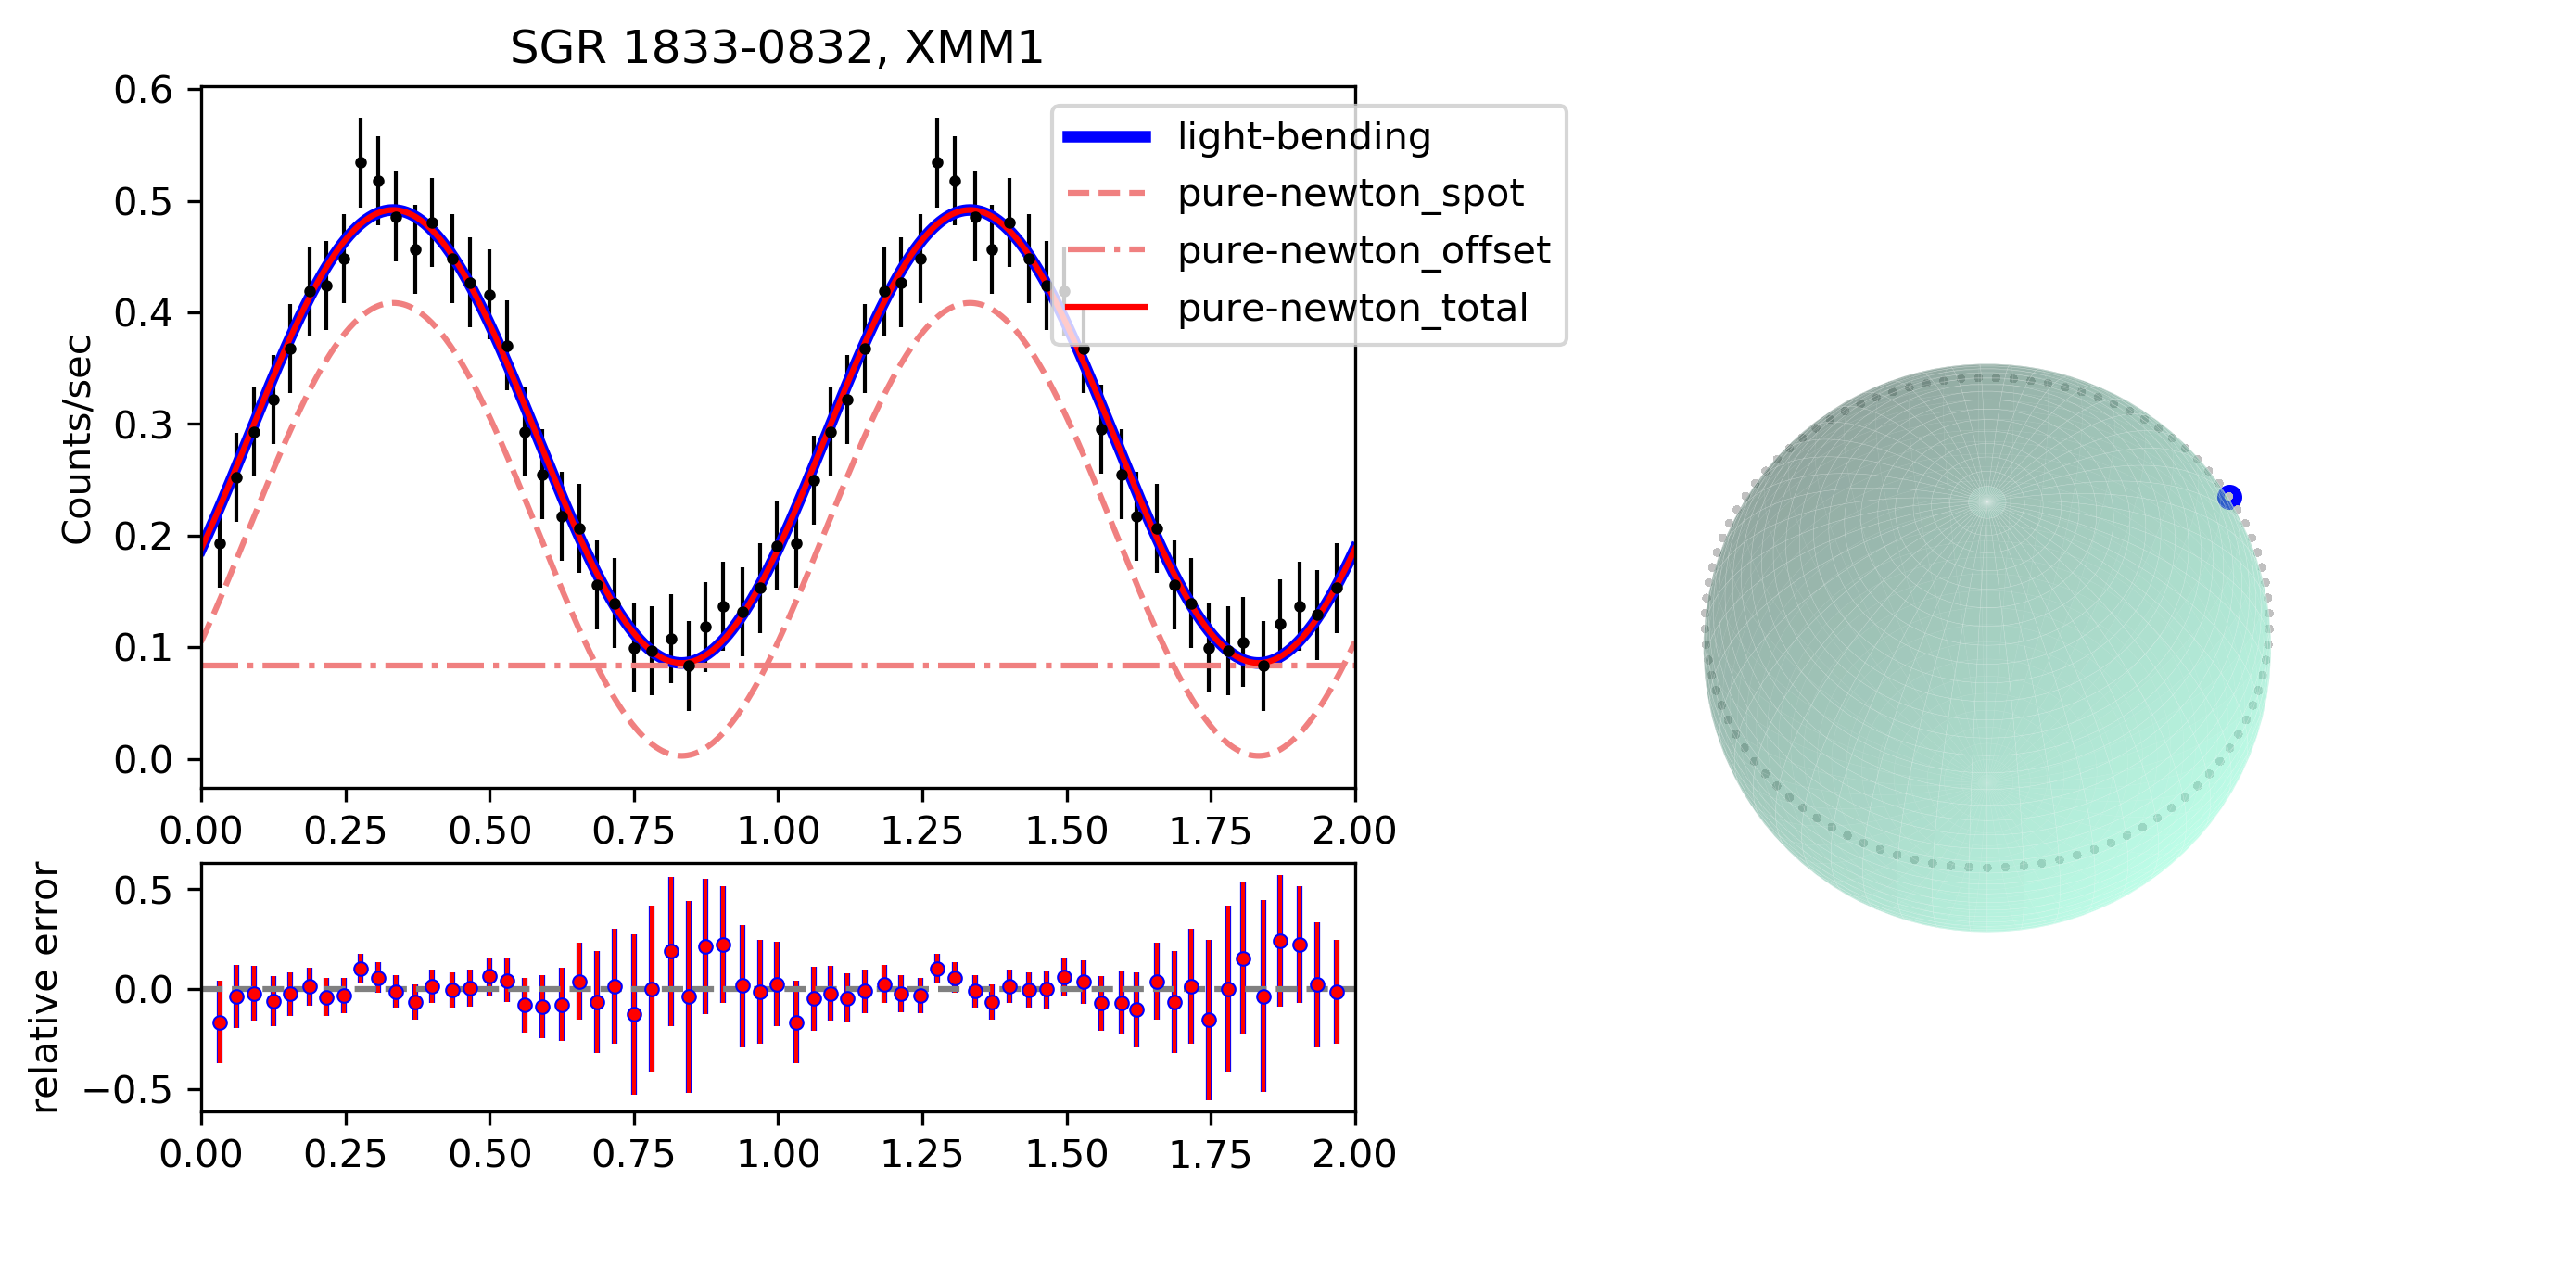

inclination angle: 29.603371882557123
Hot_spot_1: 77.60280732165643 119.77106977272254 0.630846947626054

Hot_spot_1_newton: 77.86940473951435 119.77106976802187 1.0


In [10]:
# SGR 1833-0832

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D

# load data
# magnetar 4U 0142+61 from paper:
df = pd.read_csv('SGR 1833-0832.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

# geometric figure
# Create a new figure
fig = plt.figure(figsize = (12.0, 6.0), dpi = 300)
ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan = 18, colspan = 5, projection = "3d")
ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan = 11, colspan = 5)
ax3 = plt.subplot2grid((20, 11), (14, 0), rowspan = 4, colspan = 5)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)

# initial setup
b_ini = np.radians(40)
# HS1
a_1_ini = np.radians(125)
c_1_ini = np.radians(120)
d_1_ini = 1
# # HS2
# a_2_ini = np.radians(160)
# c_2_ini = np.radians(250)
# d_2_ini = 10
# # HS3 140 single
# a_3_ini = np.radians(32)
# c_3_ini = np.radians(140)
# d_3_ini = 1.05



# light-bending factor
f_lb = 1. / 3.

def newton(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    return y

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    return F

def func_n(x, a, b, c, d):
    return (newton(x, a, b, c, d) + abs(newton(x, a, b, c, d))) / 2

def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

data_uncertainty = np.empty(0)
for i in range(0, len(y_data)):
    data_uncertainty = np.append(data_uncertainty, 0.04)

# fitting
parameter_initial_3 = np.array([a_1_ini, b_ini, c_1_ini, d_1_ini])

parameter_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, sigma = data_uncertainty, p0 = parameter_initial_3)

y_fitting = func(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3])
y_fitting_same_size_as_y_data = func(x_data, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3])

# fitting newton + stationary emission
# parameter_initial_n = np.array([a_1_ini, b_ini, c_1_ini, d_1_ini])
# y_data_newton = [y_data - min(y_data) for y_data in y_data_newton]
y_data_newton = y_data - min(y_data)
parameter_optimal_n, covariance_n = scipy.optimize.curve_fit(func_n, x_data, y_data_newton, sigma = data_uncertainty, p0 = parameter_initial_3)
y_fitting_n = func_n(x, parameter_optimal_n[0], parameter_optimal_n[1], parameter_optimal_n[2], parameter_optimal_n[3])
y_fitting_same_size_as_y_data_n = func_n(x_data, parameter_optimal_n[0], parameter_optimal_n[1], parameter_optimal_n[2], parameter_optimal_n[3])

r = 1.01 * r
# trajectory of HS
x_track_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(parameter_optimal[0])
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 1, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.cos(parameter_optimal[2])
y_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.sin(parameter_optimal[2])
z_hs_1 = scale * r * np.cos(parameter_optimal[0])

ax2.scatter(x_hs_1, y_hs_1, z_hs_1, s = 30, c = "blue")

HS1 = func(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3])

stationary_emission = min(y_data)

# data of pulse profile
# ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
ax1.errorbar(x_data, y_data, yerr = 0.04, fmt = "o", elinewidth = 1, c = "black", markersize = 2)
# fitting of pulse profile
# ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, y_fitting, label = 'light-bending', color = 'blue', linewidth = 3)
ax1.plot(x, y_fitting_n, linestyle = "--", label = "pure-newton_spot", color = "lightcoral")
ax1.axhline(y = min(y_data), linestyle = "-.", label = "pure-newton_offset", color = "lightcoral")
ax1.plot(x, y_fitting_n + min(y_data), label = "pure-newton_total", color = "red")
# info
ax1.set_xlim(0, 2)
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
ax1.legend(bbox_to_anchor = (1.2, 1), loc = "upper right")
ax1.set_title("SGR 1833-0832, XMM1")

ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.set_zlim(-1.1, 1.1)
ax2.view_init(elev = 90 - np.degrees(parameter_optimal[1]), azim = 0)
ax2.axis("off")

# ax3.plot(x_data, (y_data - y_fitting_same_size_as_y_data) / y_data)
ax3.errorbar(x_data, (y_data - y_fitting_same_size_as_y_data) / y_data, yerr = 0.04 / y_data, fmt = "o", elinewidth = 1.5, color = "blue", markersize = 3)
y_fit_frame_n = y_fitting_same_size_as_y_data_n + min(y_data)
ax3.errorbar(x_data, (y_data - y_fit_frame_n) / y_data, yerr = 0.04 / y_data, fmt = "o", elinewidth = 1, color = "red", markersize = 2)
ax3.axhline(y = 0, linestyle = '--', color = 'grey')
ax3.set_xlim(0, 2)
ax3.set_ylabel('relative error')
plt.show()
# print(parameter_optimal)
print("inclination angle:", np.degrees(parameter_optimal[1]))
print("Hot_spot_1:", np.degrees(parameter_optimal[0]), np.degrees(parameter_optimal[2]), parameter_optimal[3])
print()
print("Hot_spot_1_newton:", np.degrees(parameter_optimal_n[0]), np.degrees(parameter_optimal_n[2]), parameter_optimal_n[3])

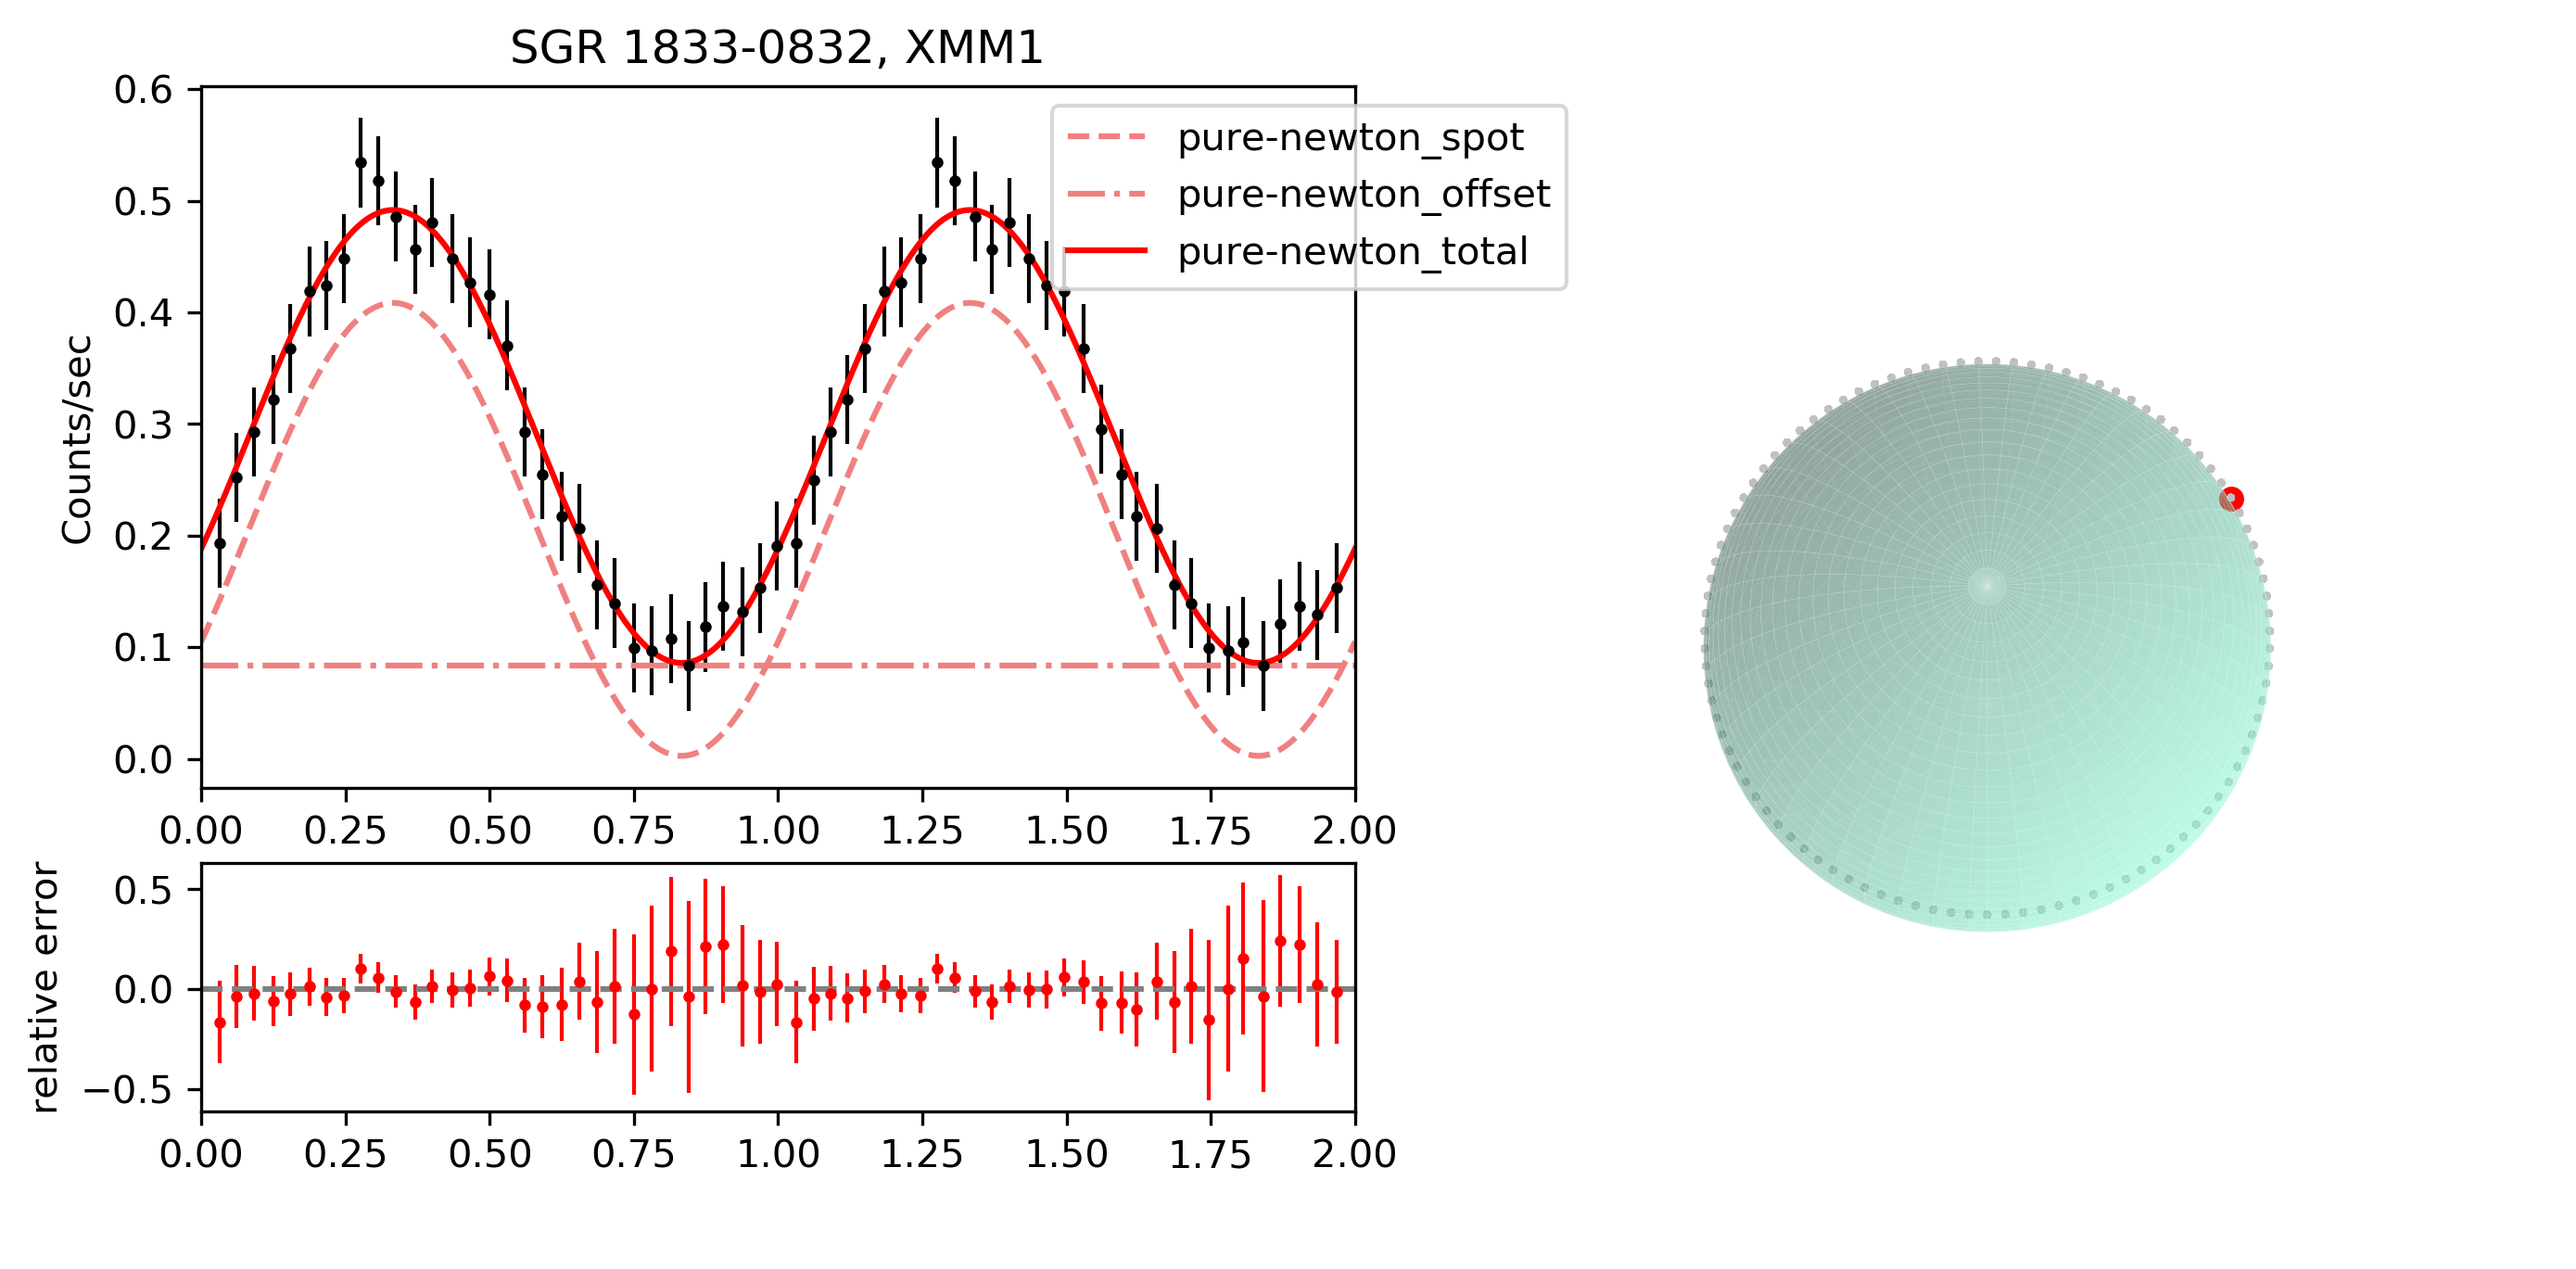

inclination angle: 29.603371882557123
Hot_spot_1: 77.60280732165643 119.77106977272254 0.630846947626054
inclination 11.978579700721344
Hot_spot_1_newton: 77.86940473951435 119.77106976802187 1.0


In [9]:
# SGR 1833-0832

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D

# load data
# magnetar 4U 0142+61 from paper:
df = pd.read_csv('SGR 1833-0832.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

# geometric figure
# Create a new figure
fig = plt.figure(figsize = (12.0, 6.0), dpi = 300)
ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan = 18, colspan = 5, projection = "3d")
ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan = 11, colspan = 5)
ax3 = plt.subplot2grid((20, 11), (14, 0), rowspan = 4, colspan = 5)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)

# initial setup
b_ini = np.radians(40)
# HS1
a_1_ini = np.radians(125)
c_1_ini = np.radians(120)
d_1_ini = 1
# # HS2
# a_2_ini = np.radians(160)
# c_2_ini = np.radians(250)
# d_2_ini = 10
# # HS3 140 single
# a_3_ini = np.radians(32)
# c_3_ini = np.radians(140)
# d_3_ini = 1.05



# light-bending factor
f_lb = 1. / 3.

def newton(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    return y

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    return F

def func_n(x, a, b, c, d):
    return (newton(x, a, b, c, d) + abs(newton(x, a, b, c, d))) / 2

def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

data_uncertainty = np.empty(0)
for i in range(0, len(y_data)):
    data_uncertainty = np.append(data_uncertainty, 0.04)

# fitting
parameter_initial_3 = np.array([a_1_ini, b_ini, c_1_ini, d_1_ini])

parameter_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, sigma = data_uncertainty, p0 = parameter_initial_3)

y_fitting = func(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3])
y_fitting_same_size_as_y_data = func(x_data, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3])

# fitting newton + stationary emission
# parameter_initial_n = np.array([a_1_ini, b_ini, c_1_ini, d_1_ini])
# y_data_newton = [y_data - min(y_data) for y_data in y_data_newton]
y_data_newton = y_data - min(y_data)
parameter_optimal_n, covariance_n = scipy.optimize.curve_fit(func_n, x_data, y_data_newton, sigma = data_uncertainty, p0 = parameter_initial_3)
y_fitting_n = func_n(x, parameter_optimal_n[0], parameter_optimal_n[1], parameter_optimal_n[2], parameter_optimal_n[3])
y_fitting_same_size_as_y_data_n = func_n(x_data, parameter_optimal_n[0], parameter_optimal_n[1], parameter_optimal_n[2], parameter_optimal_n[3])

r = 1.01 * r
# trajectory of HS
x_track_hs_1 = scale * r * np.sin(parameter_optimal_n[0]) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(parameter_optimal_n[0]) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(parameter_optimal_n[0])
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 1, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(parameter_optimal_n[0]) * np.cos(parameter_optimal_n[2])
y_hs_1 = scale * r * np.sin(parameter_optimal_n[0]) * np.sin(parameter_optimal_n[2])
z_hs_1 = scale * r * np.cos(parameter_optimal_n[0])

ax2.scatter(x_hs_1, y_hs_1, z_hs_1, s = 30, c = "red")

# HS1 = func(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3])

stationary_emission = min(y_data)

# data of pulse profile
# ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
ax1.errorbar(x_data, y_data, yerr = 0.04, fmt = "o", elinewidth = 1, c = "black", markersize = 2)
# fitting of pulse profile
# ax1.plot(x, HS1, label = "HS1", color = "blue")
# ax1.plot(x, y_fitting, label = 'light-bending', color = 'blue', linewidth = 3)
ax1.plot(x, y_fitting_n, linestyle = "--", label = "pure-newton_spot", color = "lightcoral")
ax1.axhline(y = min(y_data), linestyle = "-.", label = "pure-newton_offset", color = "lightcoral")
ax1.plot(x, y_fitting_n + min(y_data), label = "pure-newton_total", color = "red")
# info
ax1.set_xlim(0, 2)
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
ax1.legend(bbox_to_anchor = (1.2, 1), loc = "upper right")
ax1.set_title("SGR 1833-0832, XMM1")

ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.set_zlim(-1.1, 1.1)
ax2.view_init(elev = 90 - np.degrees(parameter_optimal_n[1]), azim = 0)
ax2.axis("off")

# ax3.plot(x_data, (y_data - y_fitting_same_size_as_y_data) / y_data)
# ax3.errorbar(x_data, (y_data - y_fitting_same_size_as_y_data) / y_data, yerr = 0.04 / y_data, fmt = "o", elinewidth = 1.5, color = "blue", markersize = 3)
y_fit_frame_n = y_fitting_same_size_as_y_data_n + min(y_data)
ax3.errorbar(x_data, (y_data - y_fit_frame_n) / y_data, yerr = 0.04 / y_data, fmt = "o", elinewidth = 1, color = "red", markersize = 2)
ax3.axhline(y = 0, linestyle = '--', color = 'grey')
ax3.set_xlim(0, 2)
ax3.set_ylabel('relative error')
plt.show()
# print(parameter_optimal)
print("inclination angle:", np.degrees(parameter_optimal[1]))
print("Hot_spot_1:", np.degrees(parameter_optimal[0]), np.degrees(parameter_optimal[2]), parameter_optimal[3])
print("inclination", np.degrees(parameter_optimal_n[1]))
print("Hot_spot_1_newton:", np.degrees(parameter_optimal_n[0]), np.degrees(parameter_optimal_n[2]), parameter_optimal_n[3])

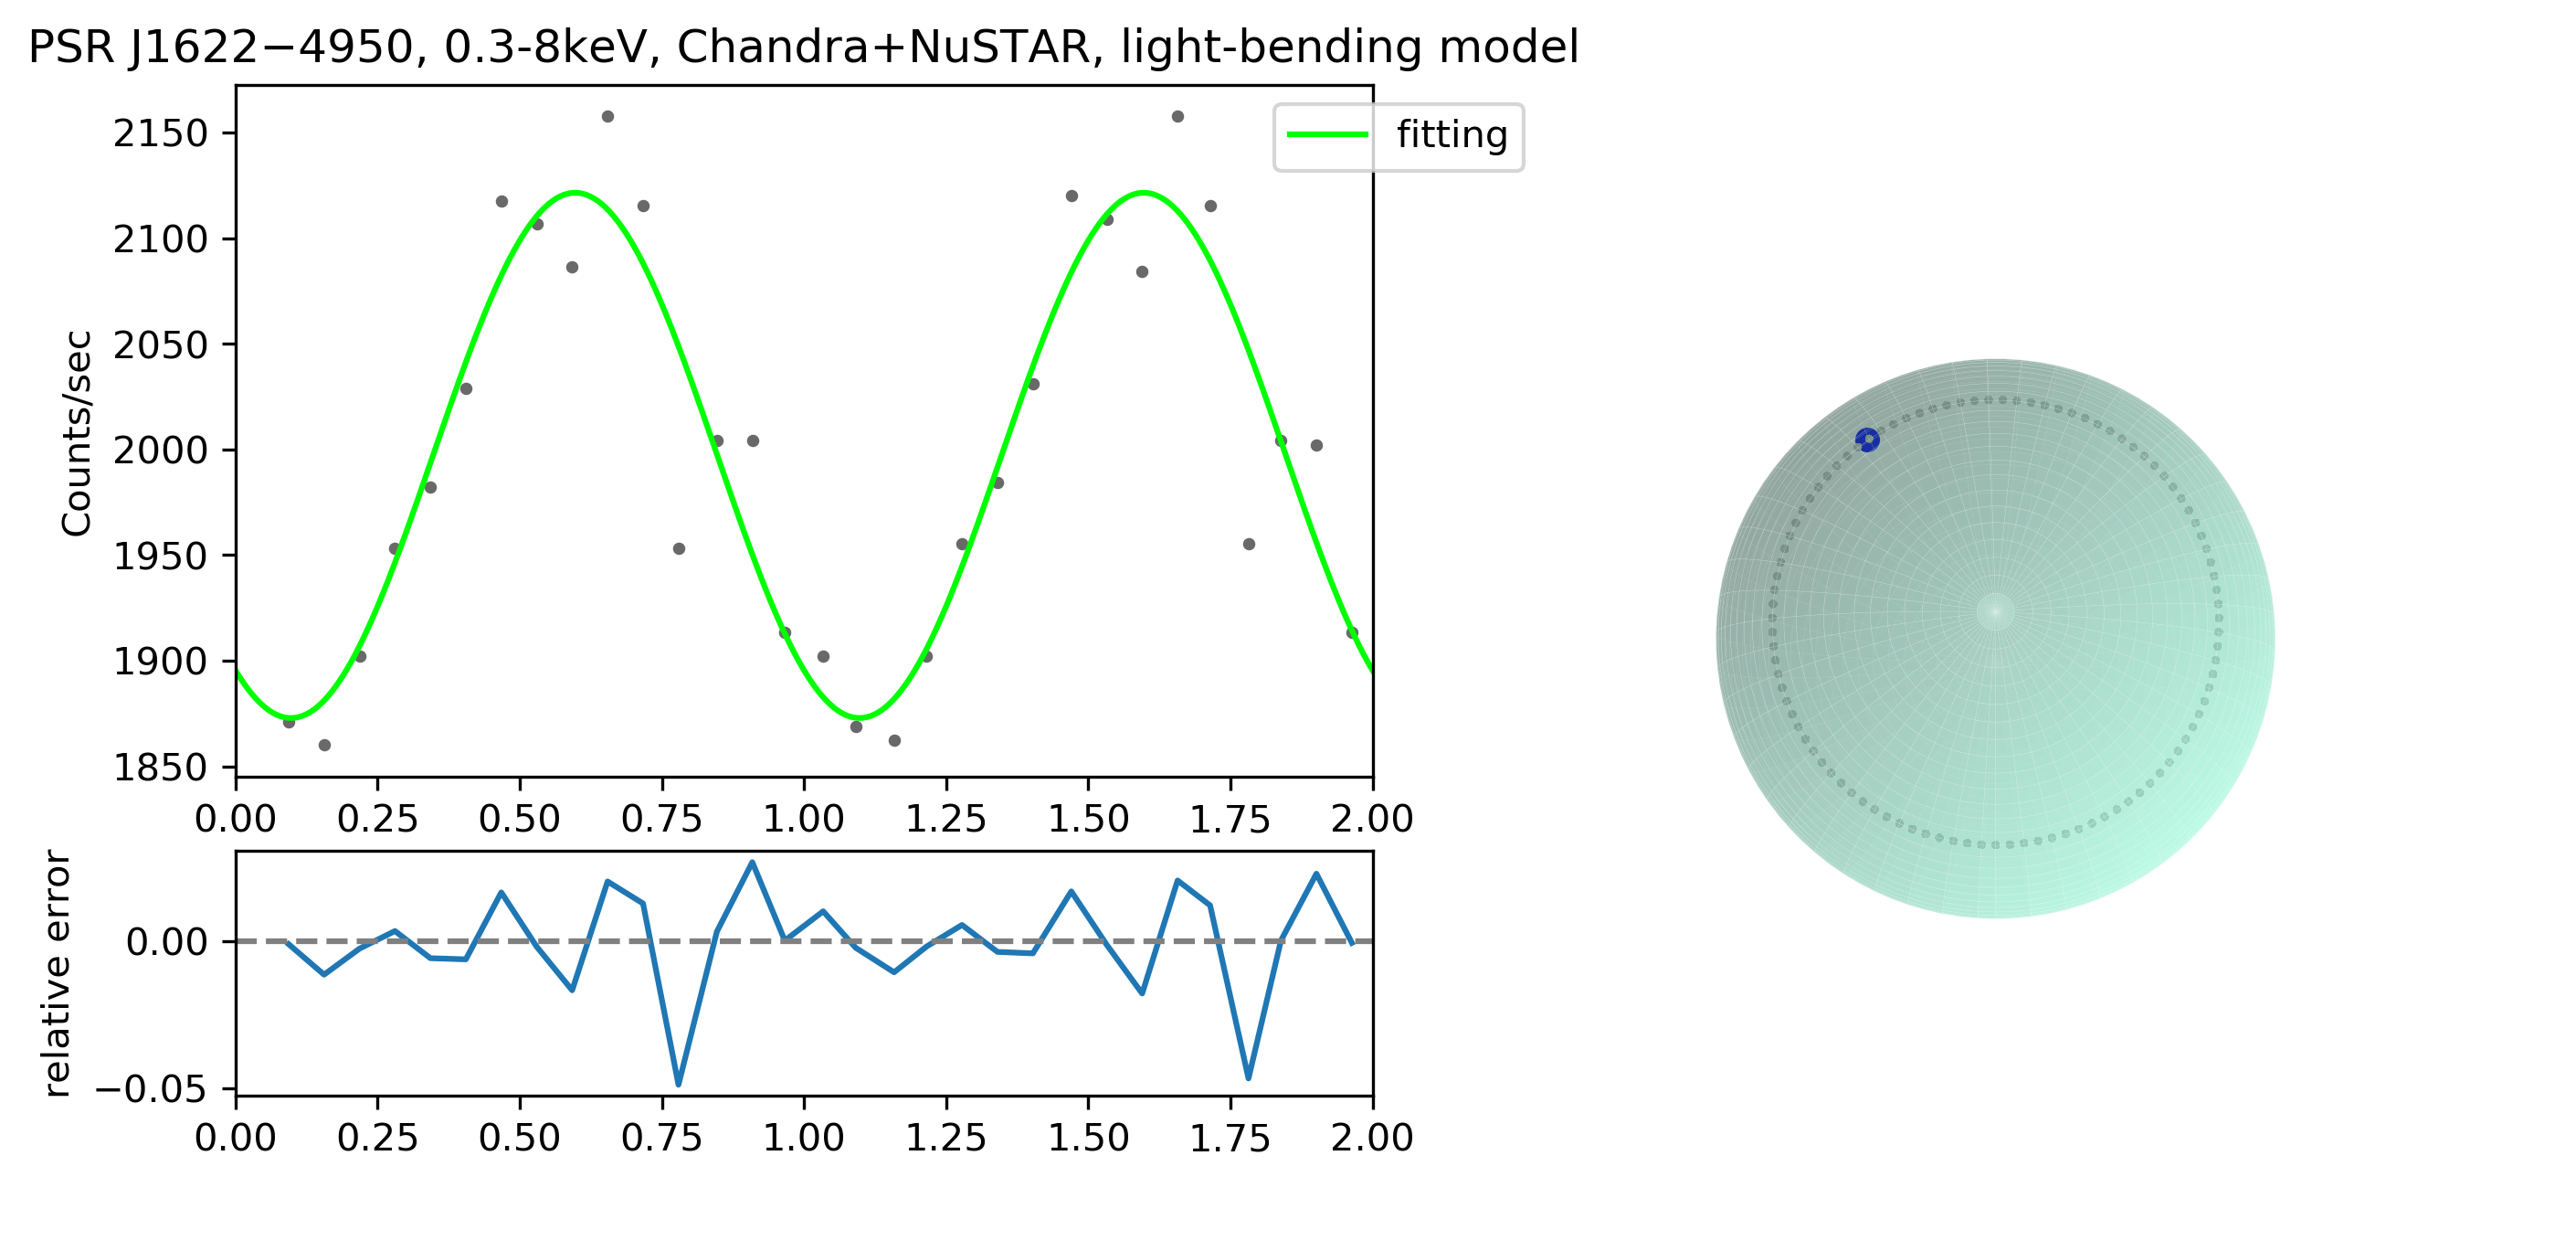

inclination angle: 5.286164259734578
Hot_spot_1: 50.21814933570119 215.0931927072051 2634.4798055320275


In [25]:
# SGR 1833-0832

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D

# load data
# magnetar 4U 0142+61 from paper:
df = pd.read_csv('PSR J1622−4950_0.3-8keV_Chandra_NuSTAR_counts.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

# geometric figure
# Create a new figure
fig = plt.figure(figsize = (12.0, 6.0), dpi = 300)
ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan = 18, colspan = 5, projection = "3d")
ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan = 11, colspan = 5)
ax3 = plt.subplot2grid((20, 11), (14, 0), rowspan = 4, colspan = 5)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)

# initial setup
b_ini = np.radians(40)
# HS1
a_1_ini = np.radians(125)
c_1_ini = np.radians(120)
d_1_ini = 3133
# # HS2
# a_2_ini = np.radians(160)
# c_2_ini = np.radians(250)
# d_2_ini = 10
# # HS3 140 single
# a_3_ini = np.radians(32)
# c_3_ini = np.radians(140)
# d_3_ini = 1.05



# light-bending factor
f_lb = 1. / 3.

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    return F
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

x = np.linspace(-0.5, 2.5, 10000)

# fitting
parameter_initial_3 = np.array([a_1_ini, b_ini, c_1_ini, d_1_ini])

parameter_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial_3)

y_fitting = func(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3])
y_fitting_same_size_as_y_data = func(x_data, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3])

r = 1.01 * r

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(parameter_optimal[0])
ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 1, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.cos(parameter_optimal[2])
y_hs_1 = scale * r * np.sin(parameter_optimal[0]) * np.sin(parameter_optimal[2])
z_hs_1 = scale * r * np.cos(parameter_optimal[0])

ax2.scatter(x_hs_1, y_hs_1, z_hs_1, s = 30, c = "blue")

HS1 = func(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3])



# data of pulse profile
ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
# fitting of pulse profile
# ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, y_fitting, label = 'fitting', color = 'lime')
# info
ax1.set_xlim(0, 2)
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
ax1.legend(bbox_to_anchor = (1.15, 1), loc = "upper right")
ax1.set_title("PSR J1622−4950, 0.3-8keV, Chandra+NuSTAR, light-bending model")

ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.set_zlim(-1.1, 1.1)
ax2.view_init(elev = 90 - np.degrees(parameter_optimal[1]), azim = 0)
ax2.axis("off")

ax3.plot(x_data, (y_data - y_fitting_same_size_as_y_data) / y_data)
ax3.axhline(y = 0, linestyle = '--', color = 'grey')
ax3.set_xlim(0, 2)
ax3.set_ylabel('relative error')
plt.show()
# print(parameter_optimal)
print("inclination angle:", np.degrees(parameter_optimal[1]))
print("Hot_spot_1:", np.degrees(parameter_optimal[0]), np.degrees(parameter_optimal[2]), parameter_optimal[3])

36.0
36
0.0
[[ 0.99465583  0.18185737  0.10132284 -0.00643078 -0.10024528 -0.1442867
  -0.12173272 -0.04119818  0.06655544  0.16036994  0.20441136]
 [ 0.99465583  0.1049954   0.17753514  0.18889207  0.13472825  0.0357324
  -0.07028242 -0.14282215 -0.15417908 -0.10001526 -0.00101941]
 [ 0.99465583  0.98792908  0.98909805  0.99215847  0.99594136  0.99900177
   1.00017075  0.99900177  0.99594136  0.99215847  0.98909805]]


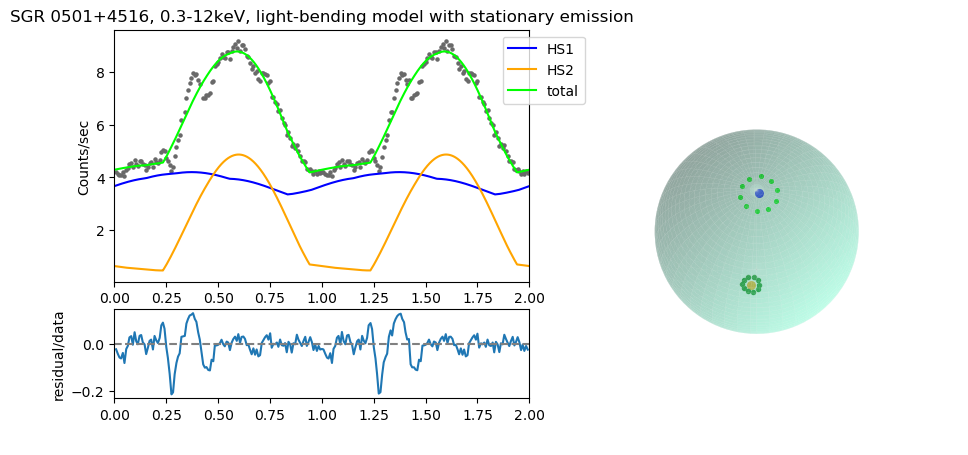

inclination angle: 67.18544974640336
Hot_spot_1: 168.15796249086176 69.88816358269904 -3.778591200646496
Hot_spot_1_sub: 19.592031505680023 0.7937694047596012
Hot_spot_2: 167.4129436798233 211.38359335929707 18.95272684972926
Hot_spot_1_sub: 56.463618599174495 0.14729412244079207


In [2]:
# SGR 0418+5729 fitting
# HS1,2 with limited size

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D


# load data
# magnetar SGR 0418+5729 from paper:
df = pd.read_csv('SGR 0501+4516_0.3-12keV_XMM-Newton.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]



# geometric figure
# Create a new figure
fig = plt.figure(figsize = (12.0, 6.0), dpi = 100)
ax2 = plt.subplot2grid((20, 11), (2, 5), rowspan = 18, colspan = 5, projection = "3d")
ax1 = plt.subplot2grid((20, 11), (2, 0), rowspan = 11, colspan = 5)
ax3 = plt.subplot2grid((20, 11), (14, 0), rowspan = 4, colspan = 5)
# Get the current axes, and tell Matplotlib to use the 3D projection

# Set the scaling factor for the sphere
scale = 1.01

# Create a sphere
r = 1 # radius
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x_sphere = r * np.sin(phi_sphere) * np.cos(theta_sphere)
y_sphere = r * np.sin(phi_sphere) * np.sin(theta_sphere)
z_sphere = r * np.cos(phi_sphere)

# Plot the sphere
ax2.plot_surface(x_sphere, y_sphere, z_sphere, alpha = 0.3, color = "aquamarine", edgecolor = "w", linewidth = 0.1)



# pulse profile
# theta = pi / 5
# i = pi / 3
# a = theta, b = i, c = phi, d = normalization
# initial parameter setting
i_ini = np.radians(35)
# HS1
theta_1_main_ini = np.radians(128)
phi_1_main_ini = np.radians(110)
m_1_main_ini = 3.4
ang_1_sub_ini = np.radians(10)
m_1_sub_ini = 0.8

# HS2
theta_2_main_ini = np.radians(145)
phi_2_main_ini = np.radians(250)
m_2_main_ini = 7
ang_2_sub_ini = np.radians(10)
m_2_sub_ini = 2

# light-bending factor
f_lb = 1. / 3.

# sub_hot_spot_number
N_sub = 10

print(360 / N_sub)
print(int(360 / N_sub))
print(360 / N_sub - int(360 / N_sub))

#############################################################################################
# function area

def mu(x, i, theta, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - f_lb) + f_lb)
    result = (abs(F) + F) / 2
    return result

def rectangular_to_polar_theta(z):
    theta_polar = np.arccos(z / (r * scale))
    return theta_polar

def rectangular_to_polar_phi(x, y):
    phi_polar = np.arctan(y / x)
    return phi_polar

def polar_to_rectangular_x(theta, phi):
    x_rectangular = scale * r * np.sin(theta) * np.cos(phi)
    return x_rectangular

def polar_to_rectangular_y(theta, phi):
    y_rectangular = scale * r * np.sin(theta) * np.sin(phi)
    return y_rectangular

def polar_to_rectangular_z(theta):
    z_rectangular = scale * r * np.cos(theta)
    return z_rectangular

def rotation_matrix(theta, phi, x, y, z):
    xyz = np.array([[x], [y], [z]])
    z_rot = np.array([[np.cos(-phi), np.sin(-phi), 0], [-np.sin(-phi), np.cos(-phi), 0], [0, 0 ,1]])
    y_rot = np.array([[np.cos(-theta), 0, -np.sin(-theta)], [0, 1, 0], [np.sin(-theta), 0, np.cos(-theta)]])
    XYZ_after_rotation = np.dot(z_rot, np.dot(y_rot, xyz))
    return XYZ_after_rotation

def sub_hot_spot_hs(N_sub, ang, theta_main, phi_main):
    delta_phi = 360 / N_sub
    temp_phi = 0
    x_hs_sub = np.empty(0)
    y_hs_sub = np.empty(0)
    z_hs_sub = np.empty(0)
    for i in range(0, N_sub):
        x_hs_sub = np.append(x_hs_sub, polar_to_rectangular_x(ang, np.radians(temp_phi)))
        y_hs_sub = np.append(y_hs_sub, polar_to_rectangular_y(ang, np.radians(temp_phi)))
        z_hs_sub = np.append(z_hs_sub, polar_to_rectangular_z(ang))
        temp_phi += delta_phi
    hs_sub_XYZ = np.empty((3, 1))
    for i in range(0, N_sub):
        hs_sub_XYZ = np.append(hs_sub_XYZ, rotation_matrix(theta_main, phi_main, x_hs_sub[i], y_hs_sub[i], z_hs_sub[i]), axis = 1)
    hs_sub_theta = np.empty(0)
    hs_sub_phi = np.empty(0)
    for i in range(0, N_sub):
        hs_sub_theta = np.append(hs_sub_theta, rectangular_to_polar_theta(hs_sub_XYZ[2, i]))
        hs_sub_phi = np.append(hs_sub_phi, rectangular_to_polar_phi(hs_sub_XYZ[1, i], hs_sub_XYZ[0, i]))
    return hs_sub_XYZ, hs_sub_theta, hs_sub_phi

#############################################################################################

def HS1(x, i, theta_1_main_ini, phi_1_main_ini, m_1_main_ini, ang_1_sub_ini, m_1_sub_ini):
    # HS1 sub
    hs_1_sub_XYZ, hs_1_sub_theta, hs_1_sub_phi = sub_hot_spot_hs(N_sub, ang_1_sub_ini, theta_1_main_ini, phi_1_main_ini)
    HS1 = mu(x, i, theta_1_main_ini, phi_1_main_ini, m_1_main_ini)
    for i in range(0, N_sub):
        HS1 += mu(x, i, hs_1_sub_theta[i], hs_1_sub_phi[i], m_1_sub_ini)
    return HS1

def HS2(x, i, theta_2_main_ini, phi_2_main_ini, m_2_main_ini, ang_2_sub_ini, m_2_sub_ini):
    # HS2 sub
    hs_2_sub_XYZ, hs_2_sub_theta, hs_2_sub_phi = sub_hot_spot_hs(N_sub, ang_2_sub_ini, theta_2_main_ini, phi_2_main_ini)
    HS2 = mu(x, i, theta_2_main_ini, phi_2_main_ini, m_2_main_ini)
    for i in range(0, N_sub):
        HS2 += mu(x, i, hs_2_sub_theta[i], hs_2_sub_phi[i], m_2_sub_ini)
    return HS2


def mu_total(x, i, theta_1_main_ini, phi_1_main_ini, m_1_main_ini, ang_1_sub_ini, m_1_sub_ini, theta_2_main_ini, phi_2_main_ini, m_2_main_ini, ang_2_sub_ini, m_2_sub_ini):
    # HS1 sub
    hs_1_sub_XYZ, hs_1_sub_theta, hs_1_sub_phi = sub_hot_spot_hs(N_sub, ang_1_sub_ini, theta_1_main_ini, phi_1_main_ini)
    # HS2 sub
    hs_2_sub_XYZ, hs_2_sub_theta, hs_2_sub_phi = sub_hot_spot_hs(N_sub, ang_2_sub_ini, theta_2_main_ini, phi_2_main_ini)
    # total
    Total = mu(x, i, theta_1_main_ini, phi_1_main_ini, m_1_main_ini) + \
            mu(x, i, theta_2_main_ini, phi_2_main_ini, m_2_main_ini)
    for i in range(0, N_sub):
        Total += mu(x, i, hs_1_sub_theta[i], hs_1_sub_phi[i], m_1_sub_ini)
        Total += mu(x, i, hs_2_sub_theta[i], hs_2_sub_phi[i], m_2_sub_ini)
    return Total

x = np.linspace(0, 2, 5000)





# fitting
# parameter_initial = np.array([-1.5, 1, 0.2, 4000])
# parameter_initial_2 = np.array([-1.5, 1, 0.2, 4000])
parameter_initial_3 = np.array([i_ini, theta_1_main_ini, phi_1_main_ini, m_1_main_ini, ang_1_sub_ini, m_1_sub_ini, theta_2_main_ini, phi_2_main_ini, m_2_main_ini, ang_2_sub_ini, m_2_sub_ini])

# parameter_initial_4 = np.array([-1.5, 1, 0.2, 4000])

# parameter_optimal, covariance = scipy.optimize.curve_fit(func_3, x_data, y_data, p0 = parameter_initial_3)


# parameter_optimal, covariance = scipy.optimize.curve_fit(mu_total, x_data, y_data, p0 = parameter_initial_3, \
#                                                         bounds = ((0, 0, 0, 0, 7, 0, 0, 0, 0, 7, 0), \
#                                                                   (90, 360, 180, 100, 20.5, 10, 90, 360, 100, 20.5, 10)))

parameter_optimal, covariance = scipy.optimize.curve_fit(mu_total, x_data, y_data, p0 = parameter_initial_3)

# print(parameter_optimal)

# y_fitting = func_3(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3], parameter_optimal[4], parameter_optimal[5], parameter_optimal[6], parameter_optimal[7], parameter_optimal[8], parameter_optimal[9])
# y_fitting_same_size_as_y_data = func_3(x_data, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3], parameter_optimal[4], parameter_optimal[5], parameter_optimal[6], parameter_optimal[7], parameter_optimal[8], parameter_optimal[9])
y_fitting = mu_total(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3], parameter_optimal[4], parameter_optimal[5], parameter_optimal[6], parameter_optimal[7], parameter_optimal[8], parameter_optimal[9], parameter_optimal[10])
y_fitting_same_size_as_y_data = mu_total(x_data, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3], parameter_optimal[4], parameter_optimal[5], parameter_optimal[6], parameter_optimal[7], parameter_optimal[8], parameter_optimal[9], parameter_optimal[10])



# trajectory of HS
x_track_hs_1 = scale * r * np.sin(parameter_optimal[1]) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(parameter_optimal[1]) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(parameter_optimal[1])
x_track_hs_2 = scale * r * np.sin(parameter_optimal[6]) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(parameter_optimal[6]) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(parameter_optimal[6])
# ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 3, color = "silver")
# ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 3, color = "silver")

# theta_sub_fit          theta_main       phi_main
# np.radians(10), N_sub, np.radians(2),   np.radians(30)
# np.radians(5),  N_sub, np.radians(170), np.radians(340)

# positions of HS
x_hs_1 = scale * r * np.sin(np.radians(2)) * np.cos(np.radians(30))
x_hs_2 = scale * r * np.sin(np.radians(170)) * np.cos(np.radians(340))
y_hs_1 = scale * r * np.sin(np.radians(2)) * np.sin(np.radians(30))
y_hs_2 = scale * r * np.sin(np.radians(170)) * np.sin(np.radians(340))
z_hs_1 = scale * r * np.cos(np.radians(2))
z_hs_2 = scale * r * np.cos(np.radians(170))

x_hs = [x_hs_1, x_hs_2]
y_hs = [y_hs_1, y_hs_2]
z_hs = [z_hs_1, z_hs_2]

HS_main_plot_size = 30
HS_sub_plot_size_1 = m_1_sub_ini / m_1_main_ini * HS_main_plot_size
HS_sub_plot_size_2 = m_2_sub_ini / m_2_main_ini * HS_main_plot_size

ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = HS_main_plot_size, c = "blue")
ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = HS_main_plot_size, c = "orange")



# positions of HS_sub

# maybe useless, for drawing subplot
def drawing_sub_hs(theta_sub_fit, N_sub, theta_main_fit, phi_main_fit):
    x_draw = np.empty(0)
    y_draw = np.empty(0)
    z_draw = np.empty(0)
    for i in range(0, N_sub):
        x_draw = np.append(x_draw, polar_to_rectangular_x(theta_sub_fit, np.radians(i * 360 / N_sub)))
        y_draw = np.append(y_draw, polar_to_rectangular_y(theta_sub_fit, np.radians(i * 360 / N_sub)))
        z_draw = np.append(z_draw, polar_to_rectangular_z(theta_sub_fit))
    hs_sub_draw = np.empty((3, 1))
    for i in range(0, N_sub):
        hs_sub_draw = np.append(hs_sub_draw, rotation_matrix(theta_main_fit, phi_main_fit, x_draw[i], y_draw[i], z_draw[i]), axis = 1)
    return hs_sub_draw

hs_sub_draw_1 = drawing_sub_hs(np.radians(10), N_sub, np.radians(2), np.radians(30))
print(hs_sub_draw_1)
for i in range(0, N_sub):
    ax2.scatter(hs_sub_draw_1[0, i + 1], hs_sub_draw_1[1, i + 1], hs_sub_draw_1[2, i + 1], zorder = 3, s = HS_sub_plot_size_1, c = "lime")

hs_sub_draw_2 = drawing_sub_hs(np.radians(5), N_sub, np.radians(170), np.radians(340))
for i in range(0, N_sub):
    ax2.scatter(hs_sub_draw_2[0, i + 1], hs_sub_draw_2[1, i + 1], hs_sub_draw_2[2, i + 1], zorder = 3, s = HS_sub_plot_size_2, c = "green")



HS1 = HS1(x, parameter_optimal[0], parameter_optimal[1], parameter_optimal[2], parameter_optimal[3], parameter_optimal[4], parameter_optimal[5])
HS2 = HS2(x, parameter_optimal[0], parameter_optimal[6], parameter_optimal[7], parameter_optimal[8], parameter_optimal[9], parameter_optimal[10])



# data of pulse profile
ax1.scatter(x_data, y_data, s = 5, c = "dimgrey")
# fitting of pulse profile
ax1.plot(x, HS1, label = "HS1", color = "blue")
ax1.plot(x, HS2, label = "HS2", color = "orange")
ax1.plot(x, y_fitting, label = 'total', color = 'lime')
# info
ax1.set_xlim(0, 2)
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts/sec')
ax1.legend(bbox_to_anchor = (1.15, 1), loc = "upper right")
ax1.set_title("SGR 0501+4516, 0.3-12keV, light-bending model with stationary emission")
# ax.text(1.8, 0.325, r"$\theta = \frac{\pi}{5}$")
# ax.text(1.8, 0.31, r"$i = \frac{\pi}{3}$")
# ax.text(1.8, 0.295, r"$\phi = \pi$")
# ax.text(0.8, 0.32, r"$amp = 0.345$")
# plt.title("3XMM J185246.6+003317のパルス波形と手合わせ曲線", fontname = "MS Gothic")

ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.set_zlim(-1.1, 1.1)
ax2.view_init(elev = np.degrees(parameter_optimal[0]), azim = 0)
ax2.axis("off")

# ax3.plot(x_data, y_data - func(x_data, a_p_1, b, c_p_1, d_p_1) - func(x_data, a_p_2, b, c_p_2, d_p_2) - func(x_data, a_p_3, b, c_p_3, d_p_3))
ax3.plot(x_data, (y_data - y_fitting_same_size_as_y_data) / y_data)
ax3.axhline(y = 0, linestyle = '--', color = 'grey')
ax3.set_xlim(0, 2)
ax3.set_ylabel('residual/data')
plt.show()
print("inclination angle:", np.degrees(parameter_optimal[0]))
print("Hot_spot_1:", np.degrees(parameter_optimal[1]), np.degrees(parameter_optimal[2]), parameter_optimal[3])
print("Hot_spot_1_sub:", np.degrees(parameter_optimal[4]), parameter_optimal[5])
print("Hot_spot_2:", np.degrees(parameter_optimal[6]), np.degrees(parameter_optimal[7]), parameter_optimal[8])
print("Hot_spot_1_sub:", np.degrees(parameter_optimal[9]), parameter_optimal[10])